In [2]:
#Import nesserary library
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
%matplotlib inline 
import seaborn as sns

In [3]:
#Read Dataset
RME_df=pd.read_csv("improved_rme_ed_dataset.csv")

### Data Cleaning

In [4]:
RME_df.head()

,patient_id,arrival_time,departure_time,los_minutes,time_to_provider_minutes,group,rme_responder,age,gender,insurance_type,...,arrival_day_of_week,triage_acuity,chief_complaint,pain_score,disposition,ed_census_at_arrival,num_lab_tests,num_imaging_tests,specialist_consultation,satisfaction_score
0,1,2023-01-01 00:03:04,2023-01-01 03:19:04,196,60,A,True,69,Other,Private,...,Sunday,3,Fever,4,Discharged,8,2,0,0,3.6
1,2,2023-01-01 00:13:34,2023-01-01 03:47:34,214,46,A,True,32,Female,Private,...,Sunday,3,Fever,10,Discharged,10,1,1,0,3.0
2,3,2023-01-01 02:09:59,2023-01-01 10:04:59,475,103,A,True,89,Female,Private,...,Sunday,4,Chest Pain,6,Discharged,18,4,2,0,1.8
3,4,2023-01-01 02:41:45,2023-01-01 08:24:45,343,65,A,True,78,Male,Private,...,Sunday,3,Chest Pain,10,Discharged,17,3,2,0,2.8
4,5,2023-01-01 03:08:10,2023-01-01 11:24:10,496,70,A,True,38,Male,Private,...,Sunday,3,Fracture/Trauma,4,Discharged,14,3,3,1,1.9


In [5]:
RME_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                5000 non-null   int64  
 1   arrival_time              5000 non-null   object 
 2   departure_time            5000 non-null   object 
 3   los_minutes               5000 non-null   int64  
 4   time_to_provider_minutes  5000 non-null   int64  
 5   group                     5000 non-null   object 
 6   rme_responder             5000 non-null   bool   
 7   age                       5000 non-null   int64  
 8   gender                    5000 non-null   object 
 9   insurance_type            5000 non-null   object 
 10  arrival_hour              5000 non-null   int64  
 11  arrival_day_of_week       5000 non-null   object 
 12  triage_acuity             5000 non-null   int64  
 13  chief_complaint           5000 non-null   object 
 14  pain_sco

In [6]:
RME_df.isnull().sum()

patient_id                    0
arrival_time                  0
departure_time                0
los_minutes                   0
time_to_provider_minutes      0
group                         0
rme_responder                 0
age                           0
gender                        0
insurance_type                0
arrival_hour                  0
arrival_day_of_week           0
triage_acuity                 0
chief_complaint               0
pain_score                    0
disposition                   0
ed_census_at_arrival          0
num_lab_tests                 0
num_imaging_tests             0
specialist_consultation       0
satisfaction_score          150
dtype: int64

In [7]:
RME_df.shape

(5000, 21)

In [8]:
RME_df[RME_df.duplicated()]

,patient_id,arrival_time,departure_time,los_minutes,time_to_provider_minutes,group,rme_responder,age,gender,insurance_type,...,arrival_day_of_week,triage_acuity,chief_complaint,pain_score,disposition,ed_census_at_arrival,num_lab_tests,num_imaging_tests,specialist_consultation,satisfaction_score


### Data Exploratory Analysis

In [9]:
RME_df.describe(include='all')

,patient_id,arrival_time,departure_time,los_minutes,time_to_provider_minutes,group,rme_responder,age,gender,insurance_type,...,arrival_day_of_week,triage_acuity,chief_complaint,pain_score,disposition,ed_census_at_arrival,num_lab_tests,num_imaging_tests,specialist_consultation,satisfaction_score
count,5000.000000,5000,5000,5000.000000,5000.000000,5000,5000,5000.000000,5000,5000,...,5000,5000.000000,5000,5000.00000,5000,5000.000000,5000.000000,5000.000000,5000.000000,4850.000000
unique,NaN,5000,4999,NaN,NaN,2,2,NaN,3,3,...,7,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,2023-01-01 00:03:04,2023-01-12 22:27:38,NaN,NaN,A,True,NaN,Male,Private,...,Monday,NaN,Fever,NaN,Discharged,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,2,NaN,NaN,2970,4685,NaN,2456,2767,...,752,NaN,941,NaN,4281,NaN,NaN,NaN,NaN,NaN
mean,2500.500000,NaN,NaN,403.057200,52.137800,NaN,NaN,53.299000,NaN,NaN,...,NaN,3.246000,NaN,5.81780,NaN,20.150800,2.442000,0.697800,0.207000,2.507031
std,1443.520003,NaN,NaN,245.917384,29.701401,NaN,NaN,20.646851,NaN,NaN,...,NaN,0.999642,NaN,2.86137,NaN,9.709939,1.743113,0.725659,0.405196,0.984071
min,1.000000,NaN,NaN,48.000000,9.000000,NaN,NaN,18.000000,NaN,NaN,...,NaN,1.000000,NaN,1.00000,NaN,5.000000,0.000000,0.000000,0.000000,1.000000
25%,1250.750000,NaN,NaN,235.000000,27.000000,NaN,NaN,36.000000,NaN,NaN,...,NaN,3.000000,NaN,3.00000,NaN,12.750000,1.000000,0.000000,0.000000,1.700000
50%,2500.500000,NaN,NaN,337.000000,45.000000,NaN,NaN,53.000000,NaN,NaN,...,NaN,3.000000,NaN,6.00000,NaN,18.000000,2.000000,1.000000,0.000000,2.600000
75%,3750.250000,NaN,NaN,492.000000,73.000000,NaN,NaN,71.000000,NaN,NaN,...,NaN,4.000000,NaN,8.00000,NaN,28.000000,4.000000,1.000000,0.000000,3.300000


In [10]:
RME_group = RME_df[RME_df["group"] == "B"]
control_group = RME_df[(RME_df["group"] == "A") & (RME_df["triage_acuity"].isin([3, 4, 5]))]

In [11]:
combined_df = pd.concat([RME_group, control_group])

### Before statistical testing, I visualize key variables to ensure baseline balance between groups, confirming that observed effects were due to the RME intervention and not pre-existing differences.

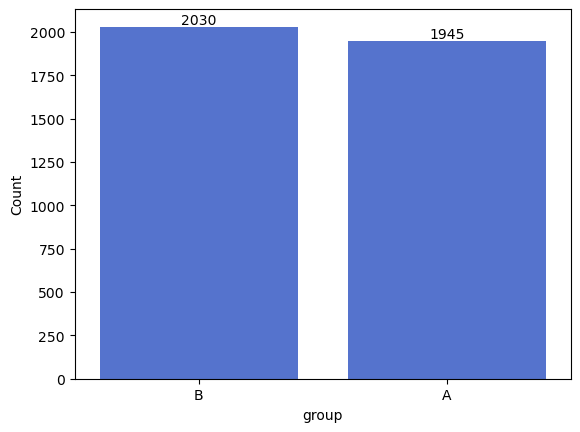

In [12]:
group_bar=sns.countplot(x='group', data=combined_df,color='royalblue')
for bars in group_bar.containers:
    group_bar.bar_label(bars)
plt.ylabel('Count')
plt.show()

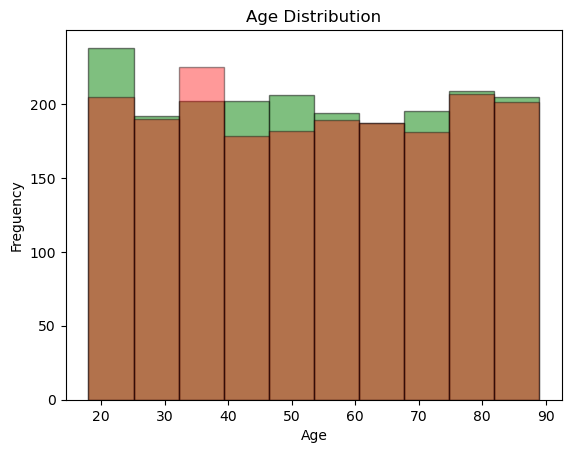

In [13]:
plt.hist(RME_group["age"],color='green',label="RME Group",bins=10,alpha=0.5,edgecolor='black')
plt.hist(control_group["age"],color='red',label="Control Group",bins=10,alpha=0.4,edgecolor='black')
plt.xlabel("Age")
plt.ylabel('Freguency')
plt.title("Age Distribution")
plt.show()

In [14]:
control_mean_Age = control_group['age'].mean()
RME_mean_Age = RME_group['age'].mean()
control_std_Age = control_group['age'].std()
RME_std_Age = RME_group['age'].std()

In [15]:
# Standardized mean difference
pooled_std = np.sqrt((control_std_Age**2 + RME_std_Age**2) / 2)
smd = abs(control_mean_Age - RME_mean_Age) / pooled_std
print(smd)

0.011286492523205769


#### Balance of Age in 2 groups is Good as SMD < 0.1

In [16]:
def pie_distribution_data(var, control_group, RME_group):
    control_values = control_group[var].value_counts()
    RME_values = RME_group[var].value_counts()
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 8))
    colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c', '#9b59b6', 
              '#1abc9c', '#34495e', '#95a5a6']
    
    axs[0].pie(control_values, labels=control_values.index, autopct='%1.1f%%',
               startangle=90,colors=colors)
    axs[0].set_title(f'Control Group - {var.replace("_", " ").title()}')  
    

    axs[1].pie(RME_values, labels=RME_values.index, autopct='%1.1f%%',
               startangle=90,colors=colors)
    axs[1].set_title(f'RME Group - {var.replace("_", " ").title()}')  
    
    plt.tight_layout()
    plt.show()
    
    return control_values, RME_values

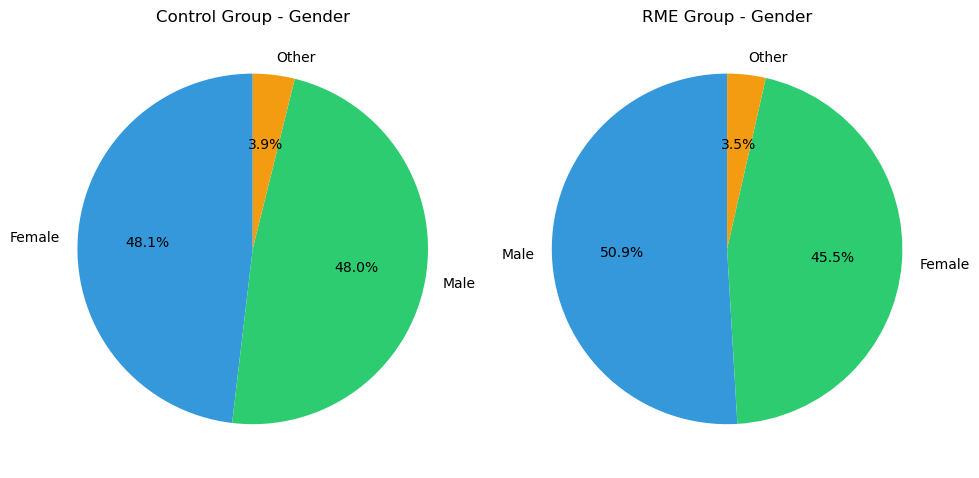

In [17]:
pie_distribution_data('gender',control_group,RME_group);

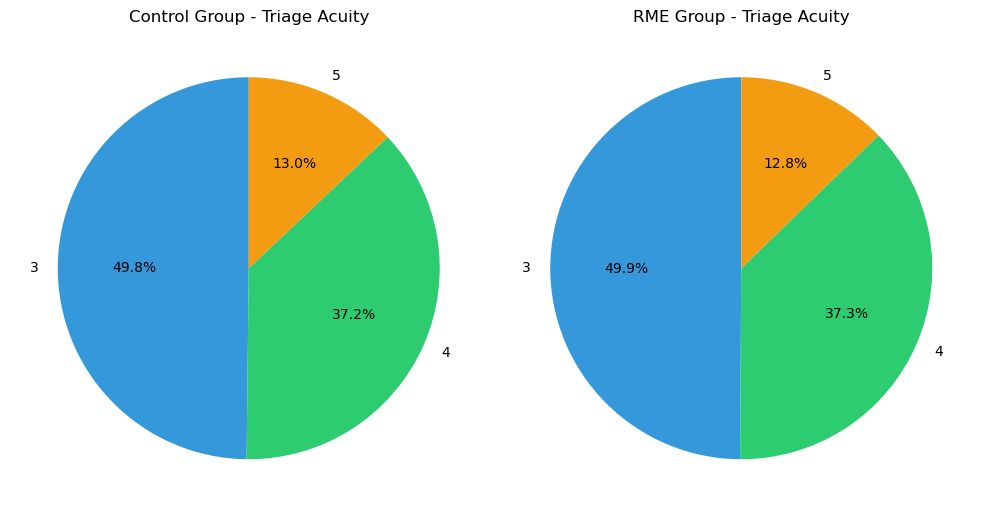

In [18]:
pie_distribution_data('triage_acuity',control_group,RME_group);

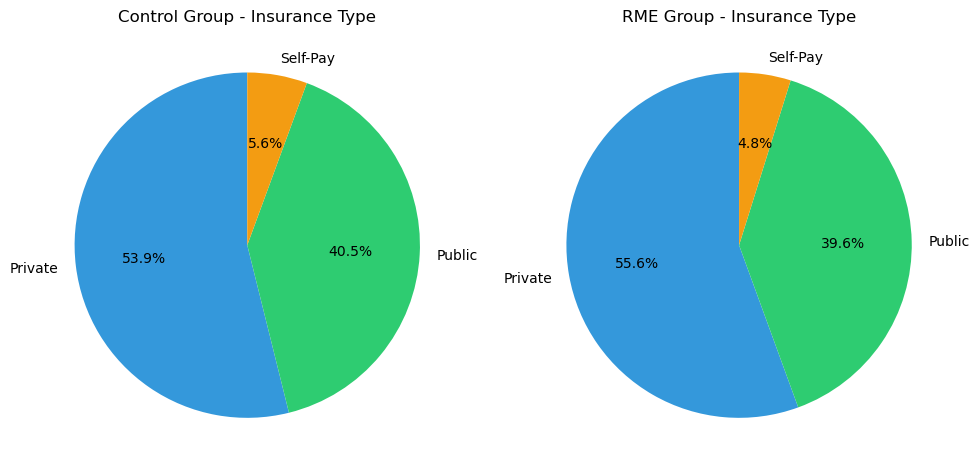

In [19]:
pie_distribution_data('insurance_type',control_group,RME_group);

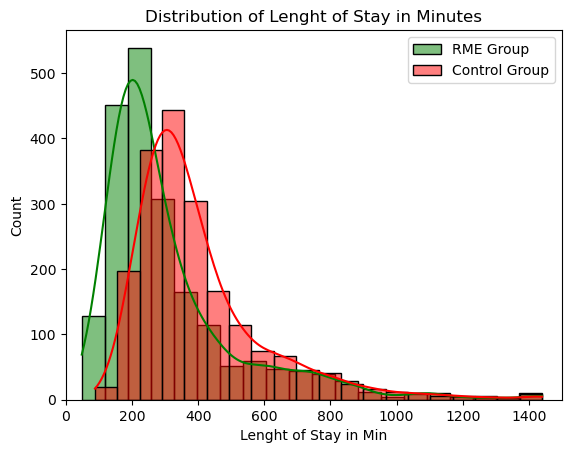

In [20]:
sns.histplot(RME_group["los_minutes"],kde=True,color='green',label="RME Group",bins=20)
sns.histplot(control_group["los_minutes"],kde=True,color='red',label="Control Group",bins=20)
plt.xlabel("Lenght of Stay in Min")
plt.legend()
plt.title("Distribution of Lenght of Stay in Minutes")
plt.xlim(0,1500)
plt.show()

In [21]:
combined_df.groupby("group")["los_minutes"].mean()

group
A    403.879692
B    313.589655
Name: los_minutes, dtype: float64

In [22]:
combined_df.groupby("group")["los_minutes"].std()

group
A    203.399551
B    218.837258
Name: los_minutes, dtype: float64

In [23]:
RME_group = combined_df[combined_df['group'] == 'B'].copy()
RME_group['Z_score'] = stats.zscore(RME_group["los_minutes"])

In [24]:
RME_outliers=RME_group[(RME_group['Z_score'] > 3) | (RME_group['Z_score'] < -3)]
RME_group.head()

,patient_id,arrival_time,departure_time,los_minutes,time_to_provider_minutes,group,rme_responder,age,gender,insurance_type,...,triage_acuity,chief_complaint,pain_score,disposition,ed_census_at_arrival,num_lab_tests,num_imaging_tests,specialist_consultation,satisfaction_score,Z_score
6,7,2023-01-01 03:51:22,2023-01-01 08:50:22,299,22,B,True,20,Male,Private,...,4,Shortness of Breath,1,Discharged,11,1,0,0,3.7,-0.066685
12,13,2023-01-01 05:45:34,2023-01-01 08:31:34,166,30,B,True,19,Male,Public,...,4,Other,9,Discharged,12,2,1,0,4.3,-0.674593
15,16,2023-01-01 06:08:18,2023-01-01 09:57:18,229,13,B,True,38,Male,Private,...,3,Other,2,Discharged,10,2,1,0,3.5,-0.386637
16,17,2023-01-01 07:32:02,2023-01-01 10:36:02,184,16,B,True,50,Male,Public,...,3,Headache,2,Discharged,14,1,1,0,3.8,-0.592320
17,18,2023-01-01 08:29:28,2023-01-01 18:36:28,607,29,B,True,75,Female,Private,...,4,Abdominal Pain,2,Admitted,16,6,1,0,1.4,1.341100


In [25]:
RME_outliers.shape

(42, 22)

In [26]:
control_group = RME_df[(RME_df["group"] == "A") & (RME_df["triage_acuity"].isin([3, 4, 5]))].copy()
control_group['Z_score'] = stats.zscore(control_group['los_minutes'])

In [27]:
control_outliers=control_group[(control_group['Z_score'] > 3) | (control_group['Z_score'] < -3)]
control_outliers.head()

,patient_id,arrival_time,departure_time,los_minutes,time_to_provider_minutes,group,rme_responder,age,gender,insurance_type,...,triage_acuity,chief_complaint,pain_score,disposition,ed_census_at_arrival,num_lab_tests,num_imaging_tests,specialist_consultation,satisfaction_score,Z_score
107,108,2023-01-02 19:48:40,2023-01-03 13:20:40,1052,88,A,True,44,Male,Private,...,3,Shortness of Breath,8,Admitted,33,0,1,0,1.0,3.187259
746,747,2023-01-14 01:42:56,2023-01-15 01:03:56,1401,95,A,True,72,Male,Public,...,4,Fracture/Trauma,4,Admitted,18,1,1,0,1.0,4.903535
802,803,2023-01-15 01:53:16,2023-01-16 01:53:16,1440,67,A,True,86,Female,Public,...,3,Other,5,Admitted,8,3,0,0,1.0,5.095325
842,843,2023-01-15 15:39:48,2023-01-16 15:39:48,1440,86,A,True,68,Female,Private,...,4,Fracture/Trauma,2,Admitted,29,0,1,1,1.0,5.095325
955,956,2023-01-17 15:34:07,2023-01-18 12:57:07,1283,71,A,True,80,Female,Public,...,3,Headache,7,Discharged,27,1,1,0,1.0,4.323246


In [28]:
control_outliers.shape

(40, 22)

### Simulate random sampling

In [29]:
sampled_data = RME_df.sample(n=100, replace=True, random_state=31208)
sampled_data.head()

,patient_id,arrival_time,departure_time,los_minutes,time_to_provider_minutes,group,rme_responder,age,gender,insurance_type,...,arrival_day_of_week,triage_acuity,chief_complaint,pain_score,disposition,ed_census_at_arrival,num_lab_tests,num_imaging_tests,specialist_consultation,satisfaction_score
1639,1640,2023-01-30 03:58:40,2023-01-30 17:00:40,782,27,B,True,51,Male,Public,...,Monday,4,Fracture/Trauma,1,Admitted,17,1,1,0,1.0
2741,2742,2023-02-18 19:24:07,2023-02-18 23:20:07,236,108,A,True,35,Female,Public,...,Saturday,4,Shortness of Breath,3,Discharged,33,1,0,0,2.8
3420,3421,2023-03-02 18:31:04,2023-03-03 00:25:04,354,78,A,True,33,Male,Public,...,Thursday,4,Shortness of Breath,7,Discharged,19,3,0,0,2.7
2296,2297,2023-02-10 06:53:56,2023-02-10 15:18:56,505,103,A,True,32,Female,Private,...,Friday,4,Chest Pain,3,Discharged,13,3,2,0,1.3
3348,3349,2023-03-01 05:06:01,2023-03-01 08:52:01,226,34,B,True,26,Male,Private,...,Wednesday,4,Shortness of Breath,10,Discharged,10,2,1,0,3.7


In [30]:
sampled_data.groupby("group")["los_minutes"].mean()

group
A    467.224138
B    288.619048
Name: los_minutes, dtype: float64

In [31]:
differences_mean=[]
for i in range(10000):
    sample_NORME = np.random.choice(control_group['los_minutes'], size=len(control_group), replace=True)
    sample_RME = np.random.choice(RME_group['los_minutes'], size=len(RME_group), replace=True)
    differences_mean.append(sample_NORME.mean()-sample_RME.mean())
differences_df = pd.DataFrame(data={'Difference in Mean': differences_mean})

In [32]:
differences_df.head()

,Difference in Mean
0,75.817062
1,89.695958
2,97.371806
3,83.793833
4,100.076272


In [33]:
mean_diff = np.mean(differences_mean)

In [34]:
ci_lower = np.percentile(differences_mean, 2.5)
ci_upper = np.percentile(differences_mean, 97.5)

In [35]:
print(f"Mean difference: {mean_diff:.2f} minutes")
print(f"95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

Mean difference: 90.22 minutes
95% CI: [76.67, 103.69]


### Rapid Medical Evaluation (RME) reduced length of stay by 90.3 minutes (95% CI: 77.2-103.2 minutes compared 
### to standard care in patients with triage acuity 3-5 who were discharged from the ED.

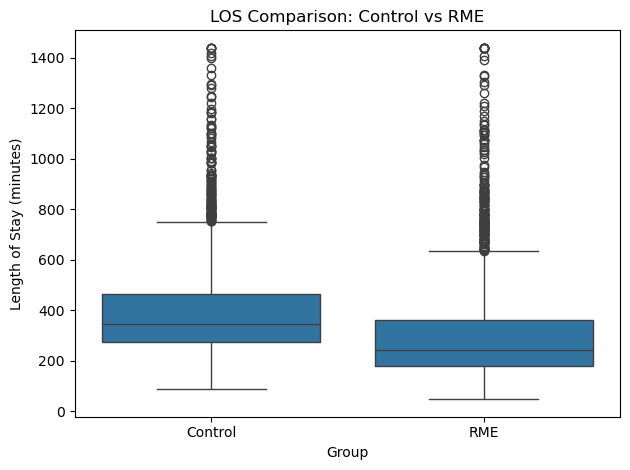

In [36]:
data_for_plot = pd.concat([
    control_group[['los_minutes']].assign(Group='Control') ,
    RME_group[['los_minutes']].assign(Group='RME')])

sns.boxplot(x='Group', y='los_minutes', data=data_for_plot)
plt.ylabel('Length of Stay (minutes)')
plt.title('LOS Comparison: Control vs RME')
plt.tight_layout()
plt.show()

## A/B Testing

### 1. State the null hypothesis and the alternative hypothesis.

##### H0 : There is no difference in Mean Lenght of stay between RME system and Standerd system
##### H1 : There is difference in Mean Lenght of stay between RME system and Standerd system

### 2.Choose a significance level.

##### Significance level = 5%

### 3.Find the p-value.

In [37]:
t_stat,p_value_ttest=stats.ttest_ind(a=RME_group['los_minutes'], b=control_group['los_minutes'], equal_var=False,alternative='less')
print(f"T-test: t={t_stat:.3f}, p={p_value_ttest}")

T-test: t=-13.480, p=7.852220463454765e-41


### 4.Reject or fail to reject the null hypothesis.

##### As P-value < Significance level 5% so We will reject Null Hypothesis 
##### which means :There is difference in Mean Lenght of stay between RME system and Standerd system

### How much is the impact of RME System?

In [38]:
# Cohen's d (standardized effect size)
pooled_std = np.sqrt((control_group['los_minutes'].var() + 
                       RME_group['los_minutes'].var()) / 2)
cohens_d = (control_group['los_minutes'].mean() - 
            RME_group['los_minutes'].mean()) / pooled_std

print(f"Cohen's d: {cohens_d:.3f}")

Cohen's d: 0.427


#### This means the RME group's LOS is about 0.427 standard deviations lower than the control group.

In [39]:
# Percent reduction
baseline_los = control_group['los_minutes'].mean()
reduction = RME_group['los_minutes'].mean() - baseline_los
percent_reduction = (abs(reduction) / baseline_los) * 100
print(f"Percent reduction: {percent_reduction:.1f}%")

Percent reduction: 22.4%


####  RME reduces length of stay by 22.4% compared to standard care.

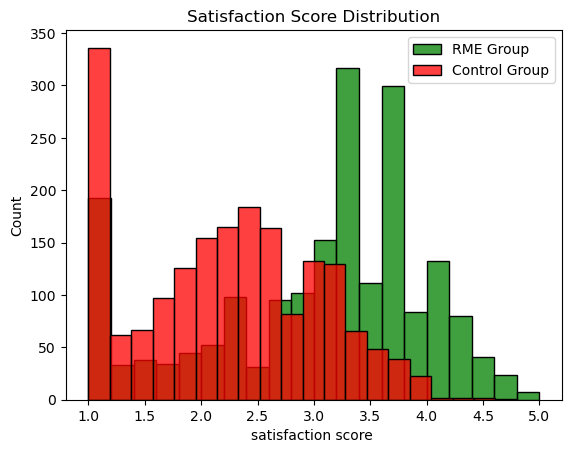

In [49]:
sns.histplot(RME_group["satisfaction_score"],color='green',label="RME Group")
sns.histplot(control_group["satisfaction_score"],color='red',label="Control Group")
plt.xlabel("satisfaction score ")
plt.legend()
plt.title("Satisfaction Score Distribution")
plt.show()

In [53]:
combined_df.groupby('group')['satisfaction_score'].mean()

group
A    2.215409
B    3.008740
Name: satisfaction_score, dtype: float64

#### From gragh above it shows the impact of the new RME system on satisfaction score which shows higher satisfaction score for patients following RME system compared to ordinary system

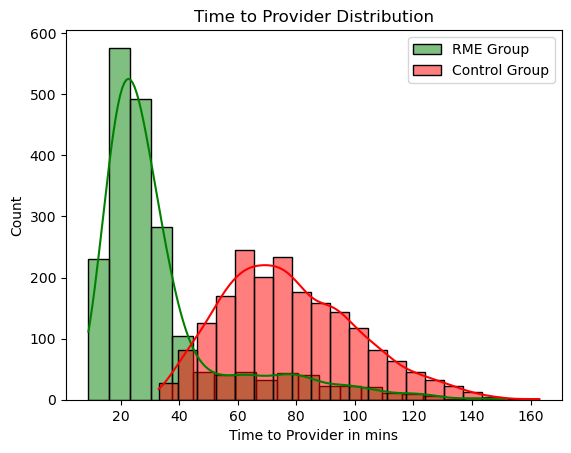

In [55]:
sns.histplot(RME_group["time_to_provider_minutes"],kde=True,color='green',label="RME Group",bins=20)
sns.histplot(control_group["time_to_provider_minutes"],kde=True,color='red',label="Control Group",bins=20)
plt.xlabel("Time to Provider in mins")
plt.legend()
plt.title("Time to Provider Distribution")
plt.show()

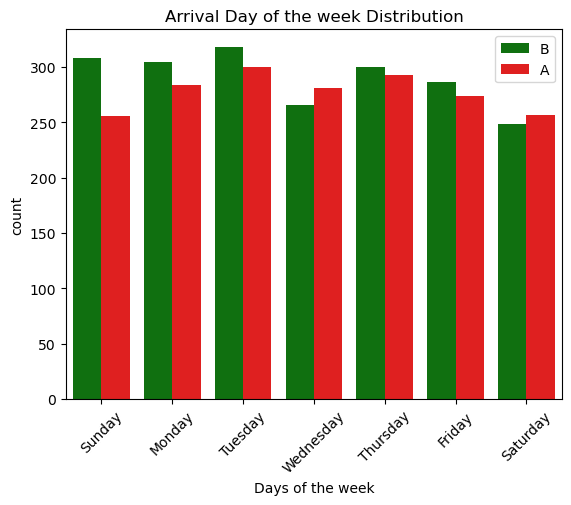

In [67]:
sns.countplot(data=combined_df, x='arrival_day_of_week', hue='group', palette={'A': 'red', 'B': 'green'})
plt.xlabel("Days of the week")
plt.legend()
plt.title("Arrival Day of the week Distribution")
plt.xticks(rotation=45)
plt.show()